In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from skimage import io
from IPython import display
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import linear_model


In [ ]:
#Importar el dataset alojado en google drive

from google.colab import drive
drive.mount('/content/drive')

!wget 'https://drive.google.com/uc?export=download&id=1VNp6srOF9wBND98nUVReoBYm6WQ-VPN0' -O Datos_semana6_Cancer.csv

data = pd.read_csv('Datos_semana6_Cancer.csv')

data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2023-11-30 02:31:33--  https://drive.google.com/uc?export=download&id=1VNp6srOF9wBND98nUVReoBYm6WQ-VPN0
Resolving drive.google.com (drive.google.com)... 74.125.199.101, 74.125.199.102, 74.125.199.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.199.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tmvm6df17ugn8gbamk90vlh1ug7ih40j/1701311475000/03559725261241112129/*/1VNp6srOF9wBND98nUVReoBYm6WQ-VPN0?e=download&uuid=b1470f5b-6bcb-40c6-94fa-02f0e5689560 [following]
--2023-11-30 02:31:34--  https://doc-0g-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tmvm6df17ugn8gbamk90vlh1ug7ih40j/1701311475000/03559725261241112129/*/1VNp6srOF9wBND98nUVReoBYm6WQ-VPN0?e=download&uuid=b1470f5b-6bcb-40c6

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
data.dropna(axis=0, how="all")

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [ ]:
#Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [ ]:
#Función para generar características estadisticas
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
#Limpieza de columnas que no son pertinentes
variables_data = data.drop(['Class'], axis=1)
variables_data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [ ]:
#Normalización de los datos
data_norm = (variables_data-variables_data.min())/(variables_data.max()-variables_data.min())
data_norm

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
678,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000
679,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
680,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111
681,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000


In [ ]:
#Calculo de similitudes dentro de clusters

wcss = []             #Lista vacía para valores de wcss

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300)  #Número de iteraciones y clusters
    kmeans.fit(data_norm)       #K-means para el df
    wcss.append(kmeans.inertia_)    #Agregación del valor wcss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

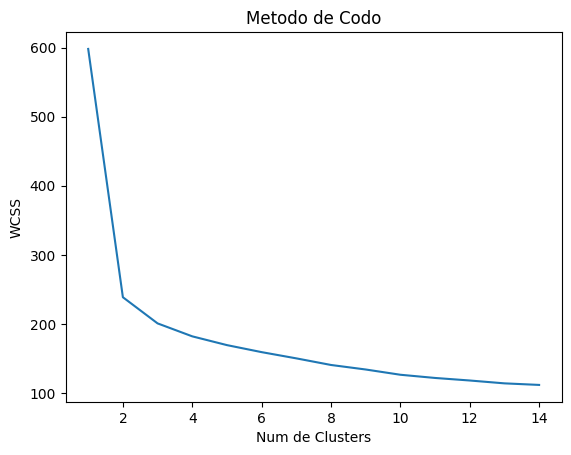

In [ ]:
#Grafica de codo
plt.plot(range(1, 15), wcss)
plt.title("Metodo de Codo")
plt.ylabel("WCSS")
plt.xlabel("Num de Clusters")
plt.show()

In [ ]:
#Definición de clusters
clustering = KMeans(n_clusters=2, max_iter= 300)
clustering.fit(data_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
#Visualización de Clusters
data['KMeans_Clusters'] = clustering.labels_
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,KMeans_Clusters
0,5,1,1,1,2,1,3,1,1,2,0
1,5,4,4,5,7,10,3,2,1,2,1
2,3,1,1,1,2,2,3,1,1,2,0
3,6,8,8,1,3,4,3,7,1,2,1
4,4,1,1,3,2,1,3,1,1,2,0


In [ ]:
#Definición de componentes
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_norm)
pca_data_df = pd.DataFrame(data = pca_data, columns= ['Componente_1', 'Componente_2'])
pca_other_data = pd.concat([pca_data_df, data[['KMeans_Clusters']]], axis=1)
pca_other_data

,Componente_1,Componente_2,KMeans_Clusters
0,-0.498011,0.002669,0
1,0.535517,-0.526637,1
2,-0.514773,-0.067726,0
3,0.566282,0.376289,1
4,-0.457381,-0.010985,0
...,...,...,...
678,-0.551931,-0.047364,0
679,-0.661830,0.025287,0
680,1.140065,0.808050,1
681,0.711241,0.277753,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


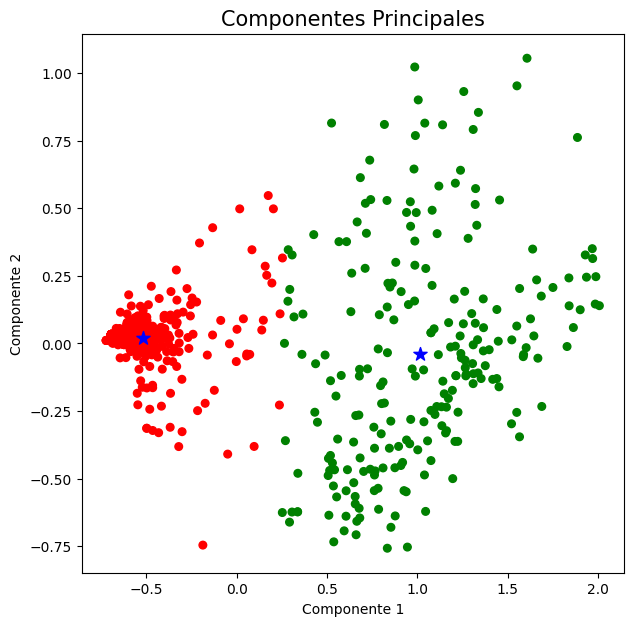

In [ ]:
#Grafica de clusters y centroides
fig = plt.figure(figsize= (7,7))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 10)
ax.set_ylabel('Componente 2', fontsize = 10)
ax.set_title('Componentes Principales', fontsize = 15)

color_theme = np.array(["red", "green", "gold",])
ax.scatter(x = pca_other_data.Componente_1, y = pca_other_data.Componente_2,
           c=color_theme[pca_other_data.KMeans_Clusters], s =30)
kmeans=KMeans(n_clusters=2).fit(pca_other_data)
centroids=kmeans.cluster_centers_
#print(centroids)
plt.scatter(centroids[:,0],centroids[:,1],c='blue',marker='*', s=100)
plt.show()

In [ ]:
#Distancia entre centroides
kmeans=KMeans(n_clusters=4).fit(pca_other_data)
centroids=kmeans.cluster_centers_
print(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 9.35313597e-01  4.83941503e-01  1.00000000e+00]
 [-5.16427079e-01  1.97697383e-02  9.99200722e-16]
 [ 1.42776711e+00 -1.48141917e-02  1.00000000e+00]
 [ 6.90265799e-01 -3.92341991e-01  1.00000000e+00]]
